In [3]:
import json
import psycopg
import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Read the JSON file as byte stream and load it into Python object using load()
with open('../database.json', 'rb') as fb:
    db_info = json.load(fb)


In [5]:
contracts = {
    'VN30F2101': ('2020-12-18', '2021-01-21'),
    'VN30F2102': ('2021-01-15', '2021-02-18'),
    'VN30F2103': ('2021-02-19', '2021-03-18'),
    'VN30F2104': ('2021-03-19', '2021-04-15'),
    'VN30F2105': ('2021-04-16', '2021-05-20'),
    'VN30F2106': ('2021-05-21', '2021-06-17'),
    'VN30F2107': ('2021-06-18', '2021-07-15'),
    'VN30F2108': ('2021-07-16', '2021-08-19'),
    'VN30F2109': ('2021-08-20', '2021-09-16'),
    'VN30F2110': ('2021-09-17', '2021-10-21'),
    'VN30F2111': ('2021-10-15', '2021-11-18'),
    'VN30F2112': ('2021-11-19', '2021-12-16'),
    'VN30F2201': ('2021-12-17', '2022-01-20'),
    'VN30F2202': ('2022-01-21', '2022-02-17'),
    'VN30F2203': ('2022-02-18', '2022-03-17'),
    'VN30F2204': ('2022-03-18', '2022-04-21'),
    'VN30F2205': ('2022-04-15', '2022-05-19'),
    'VN30F2206': ('2022-05-20', '2022-06-16'),
    'VN30F2207': ('2022-06-17', '2022-07-21'),
    'VN30F2208': ('2022-07-15', '2022-08-18'),
    'VN30F2209': ('2022-08-19', '2022-09-15'),
    'VN30F2210': ('2022-09-16', '2022-10-20'),
    'VN30F2211': ('2022-10-21', '2022-11-17'),
    'VN30F2212': ('2022-11-18', '2022-12-15'),
    'VN30F2301': ('2022-12-16', '2023-01-19'),
    'VN30F2302': ('2023-01-20', '2023-02-16'),
    'VN30F2303': ('2023-02-17', '2023-03-16'),
    'VN30F2304': ('2023-03-17', '2023-04-20'),
    'VN30F2305': ('2023-04-21', '2023-05-18'),
    'VN30F2306': ('2023-05-19', '2023-06-15'),
    'VN30F2307': ('2023-06-16', '2023-07-20'),
    'VN30F2308': ('2023-07-21', '2023-08-17'),
    'VN30F2309': ('2023-08-18', '2023-09-21'),
    'VN30F2310': ('2023-09-15', '2023-10-19'),
    'VN30F2311': ('2023-10-20', '2023-11-16'),
    'VN30F2312': ('2023-11-17', '2023-12-21')
}

# Create an empty list to store the results
all_data = []

with psycopg.connect(
    host=db_info['host'],
    port=db_info['port'],
    dbname=db_info['database'],
    user=db_info['user'],
    password=db_info['password']
) as conn:
    with conn.cursor() as cur:
        for symbol, (start_date, end_date) in contracts.items():
            cur.execute("""
                SELECT m.datetime, m.tickersymbol, m.price, v.quantity
                FROM "quote"."matched" m
                LEFT JOIN "quote"."total" v
                ON m.tickersymbol = v.tickersymbol AND m.datetime = v.datetime
                WHERE m.datetime BETWEEN %s AND %s
                AND m.tickersymbol = %s
            """, (start_date, end_date, symbol))
            
            rows = cur.fetchall()
            all_data.extend(rows)  # Add result to list

# Convert the list of tuples into a DataFrame
df = pd.DataFrame(all_data, columns=['datetime', 'tickersymbol', 'price', 'quantity'])

df

,datetime,tickersymbol,price,quantity
0,2021-01-15 10:29:55.249470,VN30F2101,1193.80,NaN
1,2021-01-15 10:30:01.751771,VN30F2101,1194.00,NaN
2,2021-01-15 10:30:07.267981,VN30F2101,1193.80,NaN
3,2021-01-15 10:30:18.646696,VN30F2101,1193.90,NaN
4,2021-01-15 10:30:19.898463,VN30F2101,1193.80,NaN
...,...,...,...,...
2147850,2023-12-20 14:44:49.171591,VN30F2312,1096.10,NaN
2147851,2023-12-20 14:44:54.247655,VN30F2312,1096.20,NaN
2147852,2023-12-20 14:44:55.282236,VN30F2312,1096.00,NaN
2147853,2023-12-20 14:44:57.304817,VN30F2312,1096.10,NaN


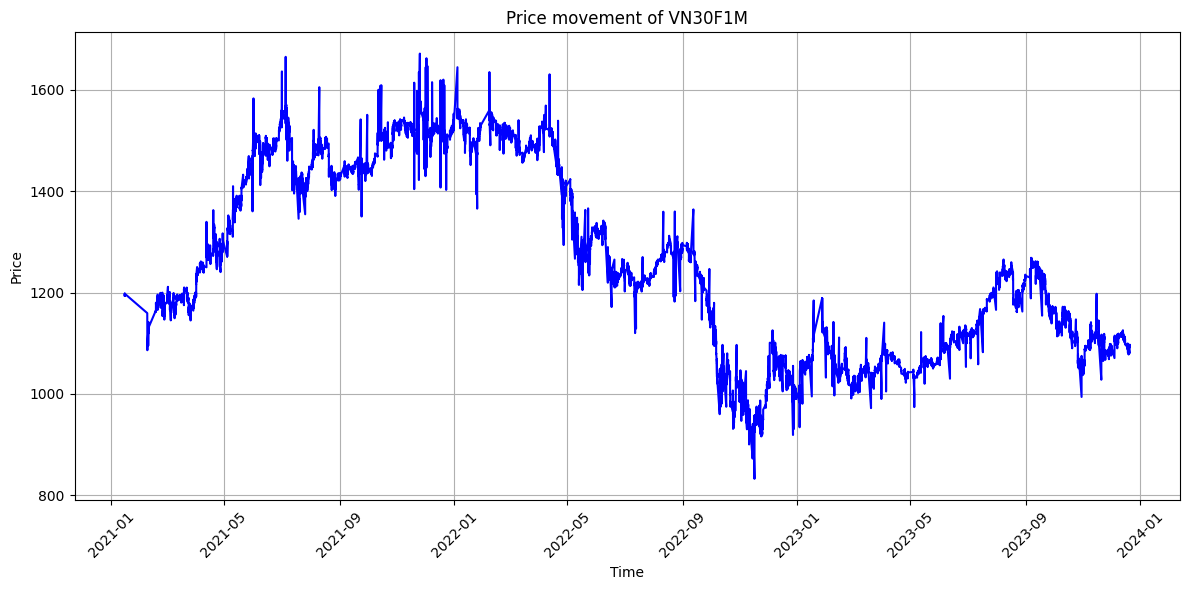

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['price'], label = "Price", color = "blue")
plt.title('Price movement of VN30F1M')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df

In [8]:
df.to_csv("df.csv", index= False)